<a href="https://colab.research.google.com/github/kamilahudda/API-for-a-To-Do-List/blob/main/machine_learning_task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

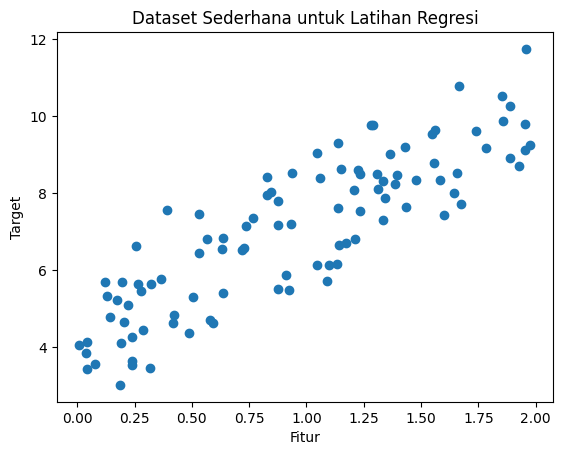

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Buat dataset sederhana
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Fitur
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (dengan sedikit noise)

# Plot dataset
plt.scatter(X, y)
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.title('Dataset Sederhana untuk Latihan Regresi')
plt.show()

In [9]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data
model.fit(X, y)

# Prediksi
y_pred = model.predict(X)

# Koefisien (slope) dan intersep dari model
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print("Koefisien (slope):", slope)
print("Intersep:", intercept)

Koefisien (slope): 2.968467510701019
Intersep: 4.222151077447231


In [10]:
# Evaluasi regresi
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

In [11]:
print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

R^2 Score: 0.7469629925504755
RMSE: 0.9962121504602561
MAE: 0.8492581983239289
MSE: 0.9924386487246479
MAPE: 13.42908835971463


In [12]:
# KLASIFIKASI
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns

In [13]:
# Muat dataset
wine = load_wine()

# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Inisialisasi model klasifikasi
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi klasifikasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Akurasi: 0.9444444444444444
Presisi: 0.9583333333333334
Recall: 0.9345238095238096
F1 Score: 0.94320987654321


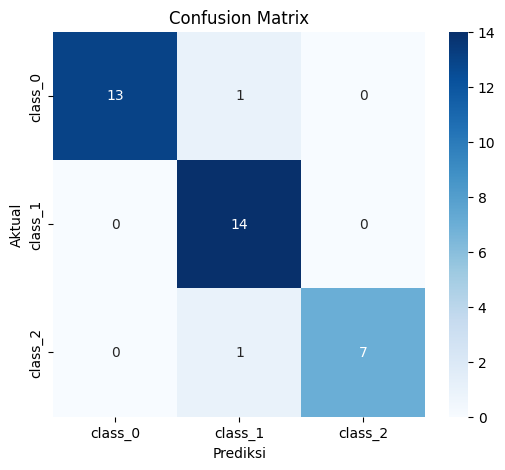

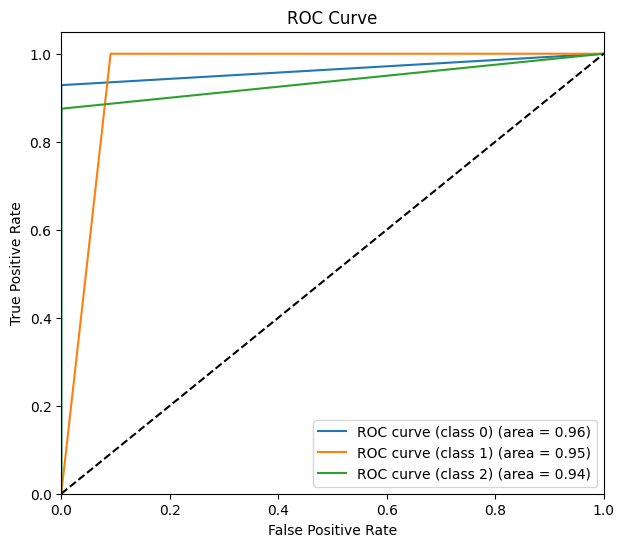

In [15]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize target
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(7, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()